In [1]:
from nimlab import datasets as nimds
import numpy as np
from nilearn import image, plotting, maskers
import nibabel as nib
import os
import pandas as pd
import glob
import platform
import warnings
warnings.filterwarnings('ignore')

In [10]:
analysis = '_decorrupted'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    data1 = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/interaction_analysis/whole_brain_analysis/permutation_results/reconstructed_niftis/unthresholded_interaction_coefficient/thresholded_by_permuted_t_value_p_values_under_threshold_0.05/generated_nifti.nii'   
    out_dir = os.path.join(data1.split('.')[0], 'decorrupted_nifti') 
    #out_dir = r'path to out dir here'
    print('I have set pathnames in the Mac style')
if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)

I have set pathnames in the Mac style


In [7]:
img = image.load_img(data1)
#Organize files into manipulatable dataframes
data = img.get_fdata(); data = np.nan_to_num(data, nan=0, posinf=10, neginf=-10)
print(data.shape)

(91, 109, 91)



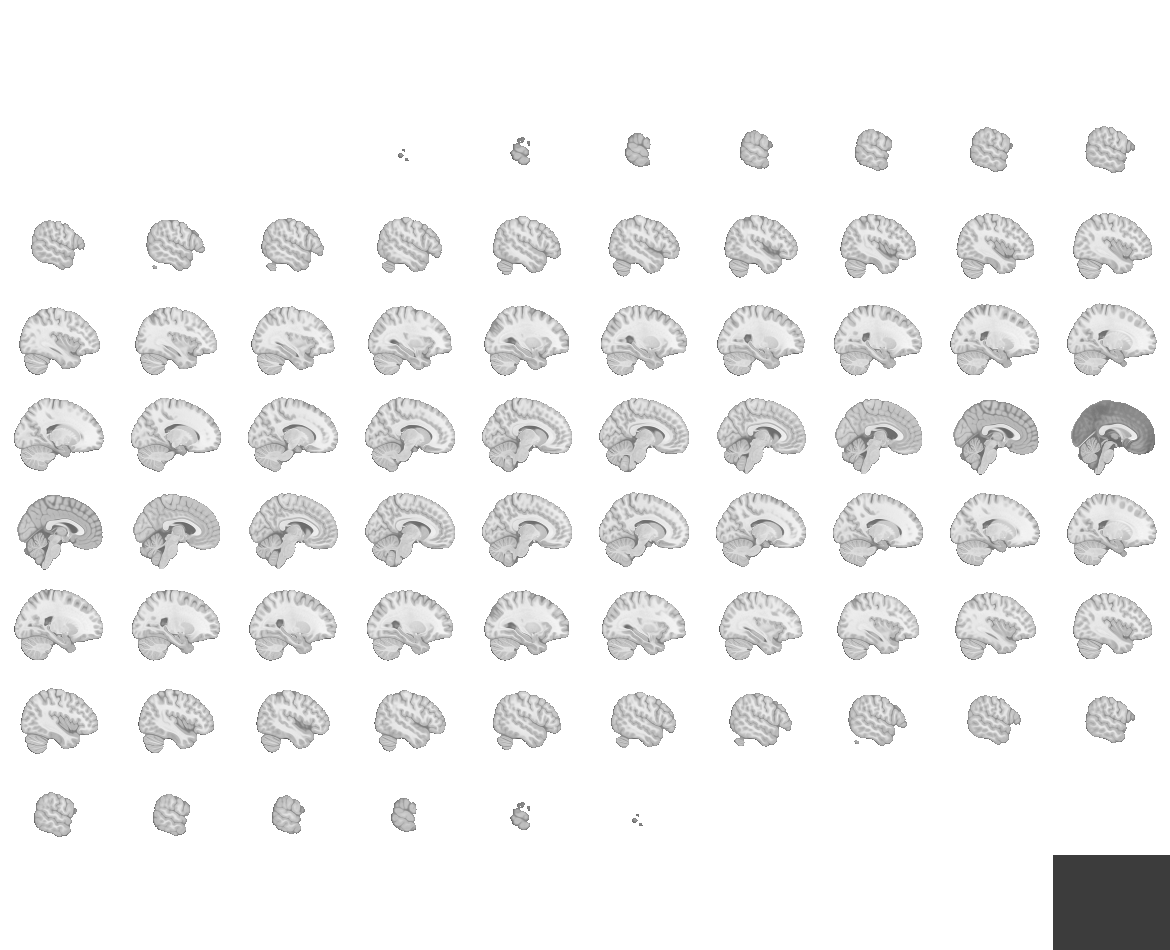
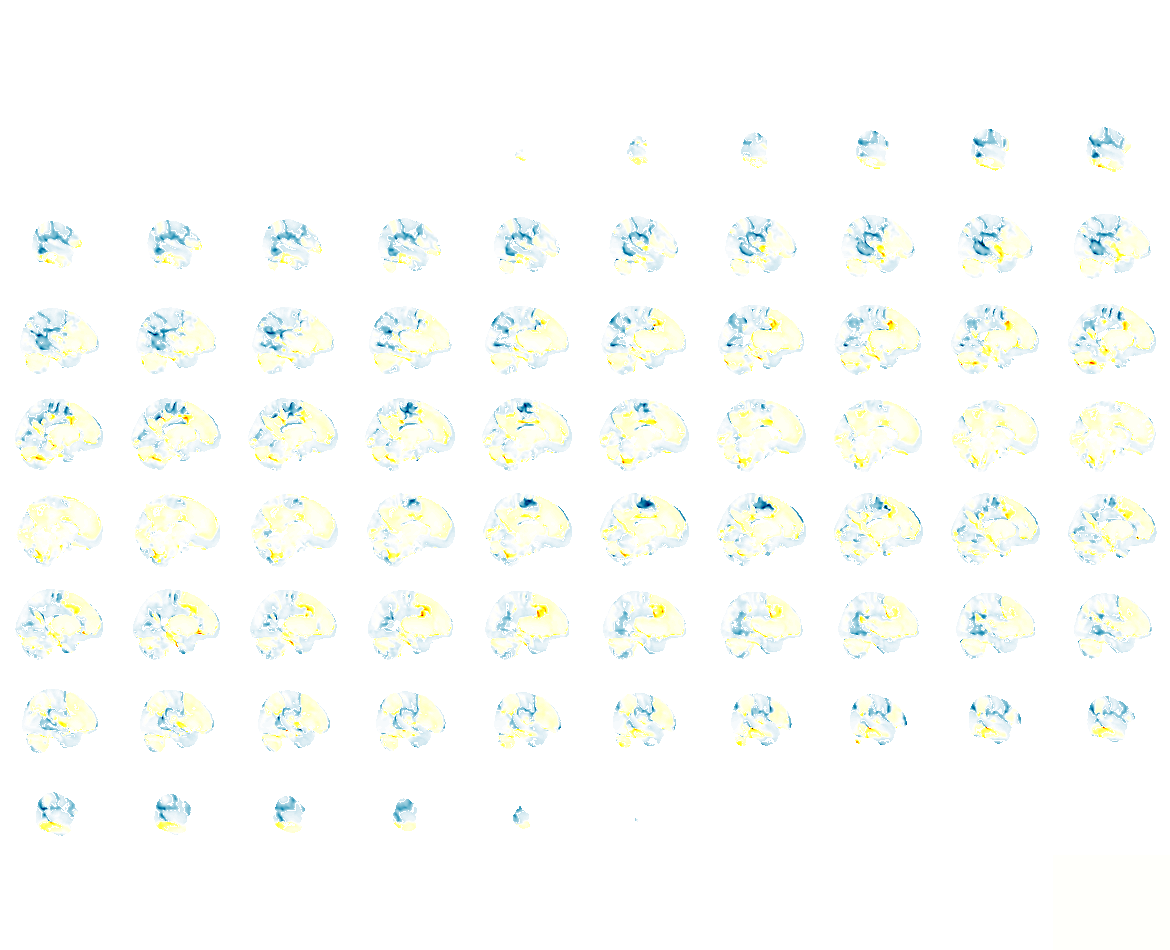

In [11]:
#Ensure Success
mask = nimds.get_img("mni_icbm152")
ovr_img1 = image.new_img_like(mask, data)
ovr_html1 = plotting.view_img(ovr_img1, cut_coords=(0,0,0), title=('Test Image'), black_bg=False, opacity=.75, cmap='ocean_hot')
ovr_html1

In [12]:
#Save the File
if os.path.isdir(out_dir)==False:
    os.mkdir(out_dir)
    
ovr_img1.to_filename(os.path.join(out_dir, (os.path.basename(data1))))
ovr_html1.save_as_html(os.path.join(out_dir,'file_html.html'))
print('saved to: ', out_dir)

saved to:  /Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/interaction_analysis/whole_brain_analysis/permutation_results/reconstructed_niftis/unthresholded_interaction_coefficient/thresholded_by_permuted_t_value_p_values_under_threshold_0/decorrupted_nifti
